In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
df = pd.read_csv('../data/clean/stats_salaries.csv')
df.head()

,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,WON_GAME,SALARY,INFLATION_ADJ_SALARY,TEAM_PAYROLL,INFLATION_ADJ_TEAM_PAYROLL,LEAGUE_PAYROLL,INFLATION_ADJ_LEAGUE_PAYROLL,TEAM_IMPORTANCE,LEAGUE_IMPORTANCE,TEAM_MARKET_SIZE
0,1630162,Anthony Edwards,F,36:22,4.0,10.0,0.400,3.0,8.0,0.375,...,1,10245480.0,10245480,137098327,137098327,4125163242,4125163242,0.074731,0.002484,0.033235
1,1630162,Anthony Edwards,F,34:27,9.0,19.0,0.474,4.0,11.0,0.364,...,0,10245480.0,10245480,137098327,137098327,4125163242,4125163242,0.074731,0.002484,0.033235
2,1630162,Anthony Edwards,F,25:29,7.0,15.0,0.467,2.0,8.0,0.250,...,1,10245480.0,10245480,137098327,137098327,4125163242,4125163242,0.074731,0.002484,0.033235
3,1630162,Anthony Edwards,F,32:22,7.0,13.0,0.538,1.0,5.0,0.200,...,1,10245480.0,10245480,137098327,137098327,4125163242,4125163242,0.074731,0.002484,0.033235
4,1630162,Anthony Edwards,F,37:46,5.0,13.0,0.385,1.0,6.0,0.167,...,0,10245480.0,10245480,137098327,137098327,4125163242,4125163242,0.074731,0.002484,0.033235


### How do the distributions of each numerical variable look? Which ones are normal and which ones are not?

In [3]:
#removing outliers aka players that did not play for that game 
df = df.loc[df['MIN'] != '0:00']

In [10]:
#filter out columns that contains numerical values
cols = list(df.columns[4:22])

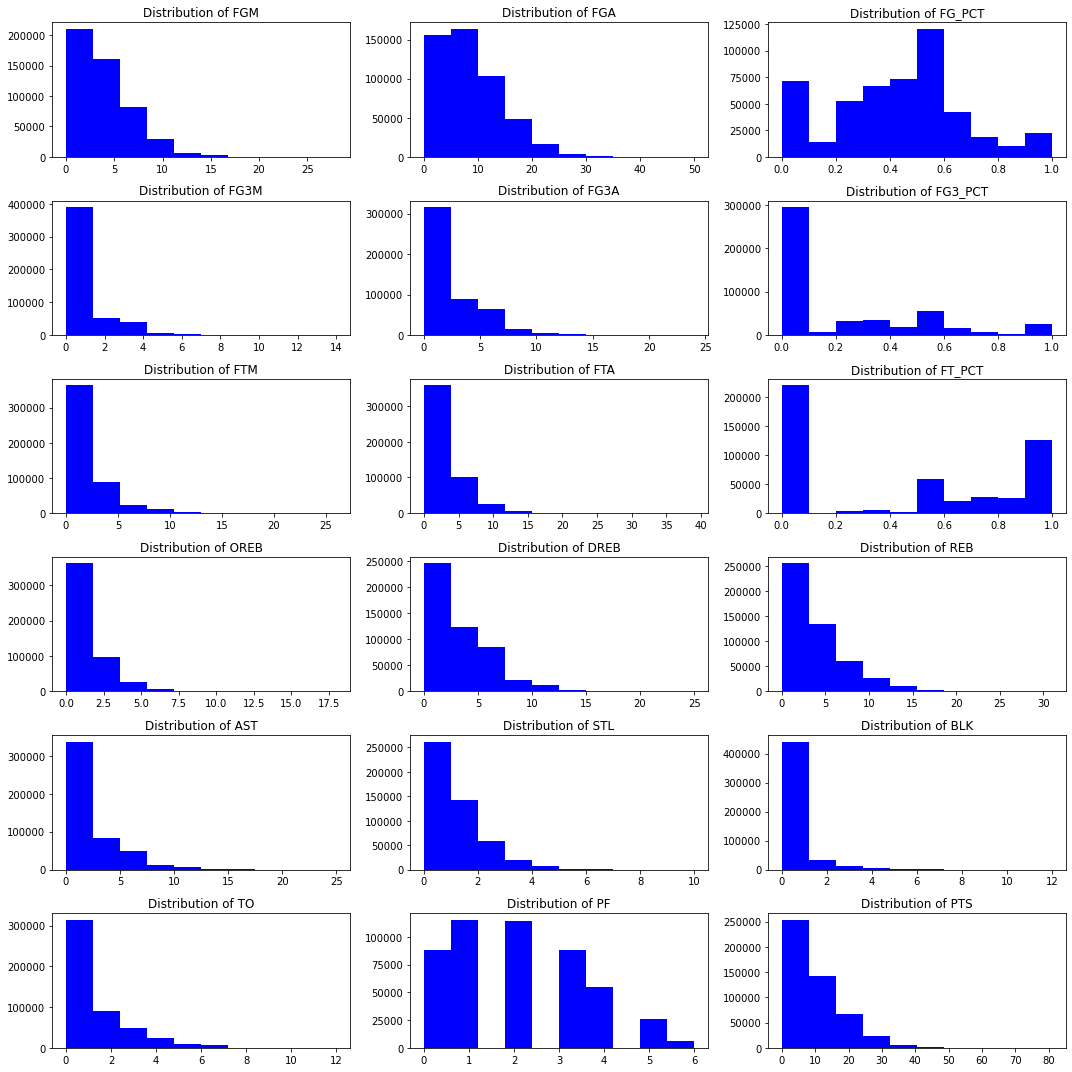

In [19]:
#plotting the distribution of each column 
fig = plt.figure(figsize=(15,15)) #10, 15 or 10, 20
for i in range(len(cols)):
    x = df[cols[i]].values
    ax = fig.add_subplot(6, 3, i+1) #9,2
    plt.hist(x, color='blue')
    plt.title(f"Distribution of {cols[i]}")
plt.tight_layout()

###  Salary and Team Payroll Analysis
We want to investigate how salary and team payroll has changed over time (both the inflation adjusted version and non-adjusted version).

In [38]:
salary = pd.read_csv('../data/raw/csv/payroll.csv')

In [39]:
#currently the columns of payroll are in strings because theres a dollar sign and commas so Im going to convert them to int
def convertToNum(x):
    x = x.replace(',', '')
    return int(x.replace('$', ''))
salary['TEAM_PAYROLL'] = salary['TEAM_PAYROLL'].apply(lambda x: convertToNum(x))
salary['INFLATION_ADJ_TEAM_PAYROLL'] = salary['INFLATION_ADJ_TEAM_PAYROLL'].apply(lambda x: convertToNum(x))
salary.head()

,Team,SEASON_START,TEAM_PAYROLL,INFLATION_ADJ_TEAM_PAYROLL
0,New York,2003,89444820,132290680
1,Portland,2003,82956768,122694724
2,Dallas,2003,79536723,117636409
3,Minnesota,2003,71272042,105412780
4,Sacramento,2003,68372826,101124779


In [31]:
teams = list(salary['Team'].unique())
len(teams)

30

In [71]:
#Plotting the trend of 30 teams and their team payroll over time into one giant graph. 
#Hmm.. this plot is too messy because there are a total of 30 teams so can disregard this EDA
def plot1(colname):
    fig = plt.figure(figsize=(20,15))
    for team in teams: 
        s = salary.loc[(salary['Team'] == team)]
        plt.plot(s['SEASON_START'].values, s[colname].values, label=team)
    plt.xlabel('Year')
    plt.ylabel('Payroll ($)')
    plt.title(f'{colname} over Time')
    plt.legend(loc='upper left')
    plt.show()

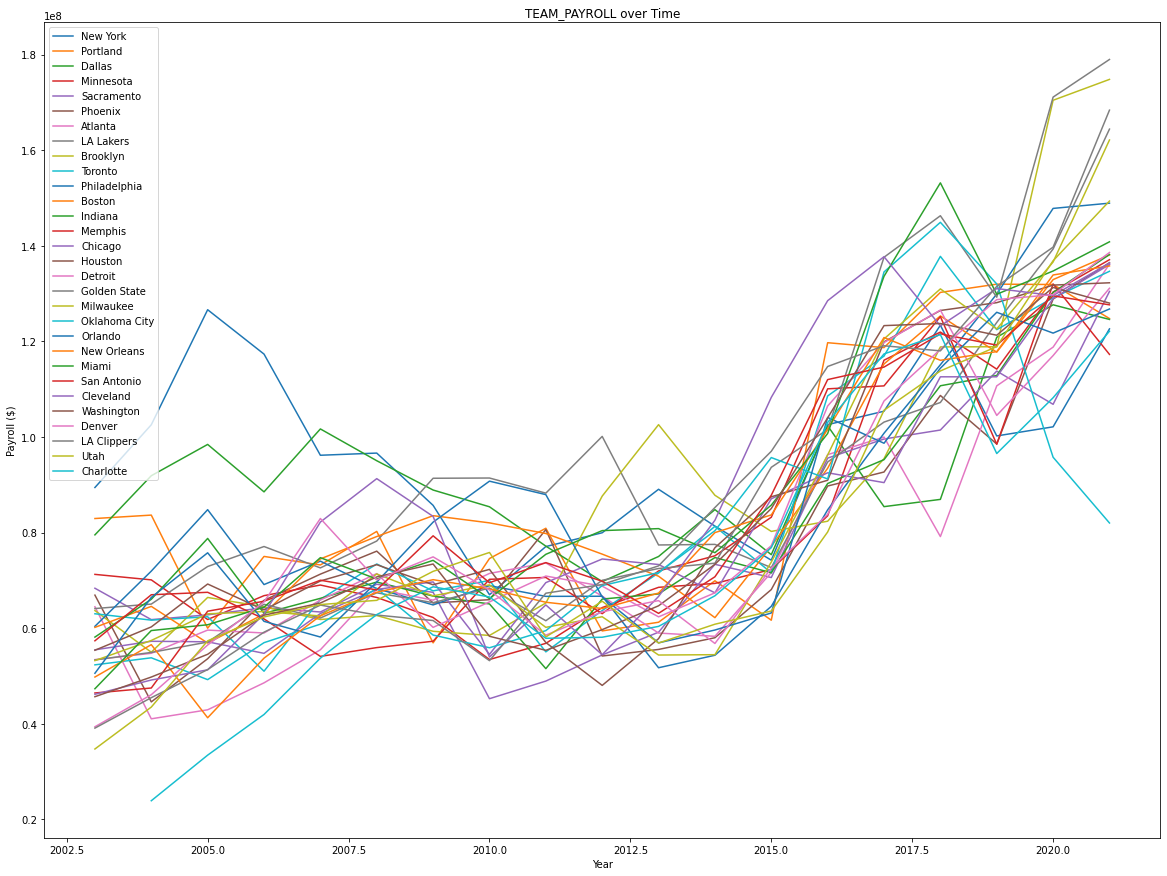

In [72]:
#plot of the non-adjusted inflation payroll
plot1('TEAM_PAYROLL')

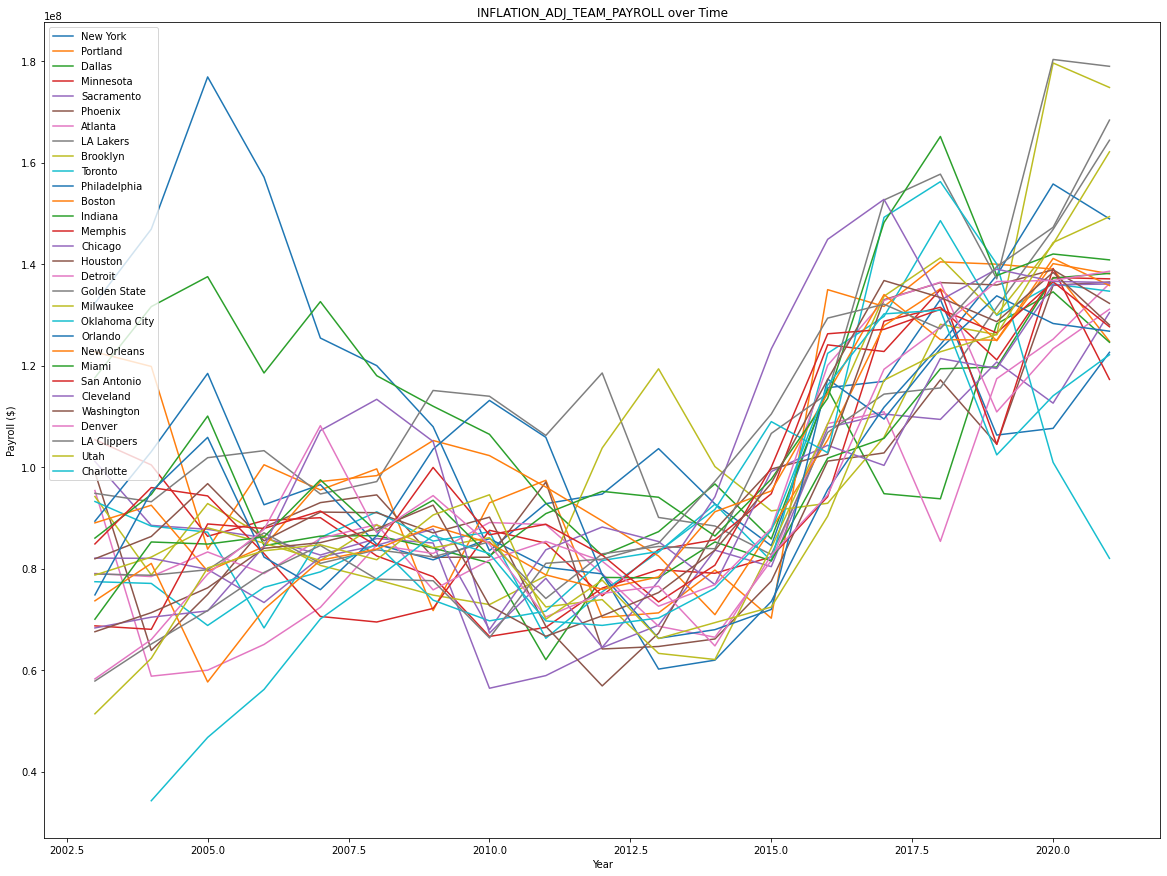

In [73]:
#plot of the inflation adjusted payroll 
plot1('INFLATION_ADJ_TEAM_PAYROLL')

In [75]:
#individualy plot 30 teams in a subplot 
def plot2(colname):
    fig = plt.figure(figsize=(20,20))
    for i in range(len(teams)):
        s = salary.loc[(salary['Team'] == teams[i])]
        ax = fig.add_subplot(10, 3, i+1)
        plt.plot(s['SEASON_START'].values, s[colname].values)
        plt.xlabel('Year')
        plt.ylabel('Payroll ($)')
        ax.set_title(f'{teams[i]} {colname} over Time')
    plt.tight_layout()

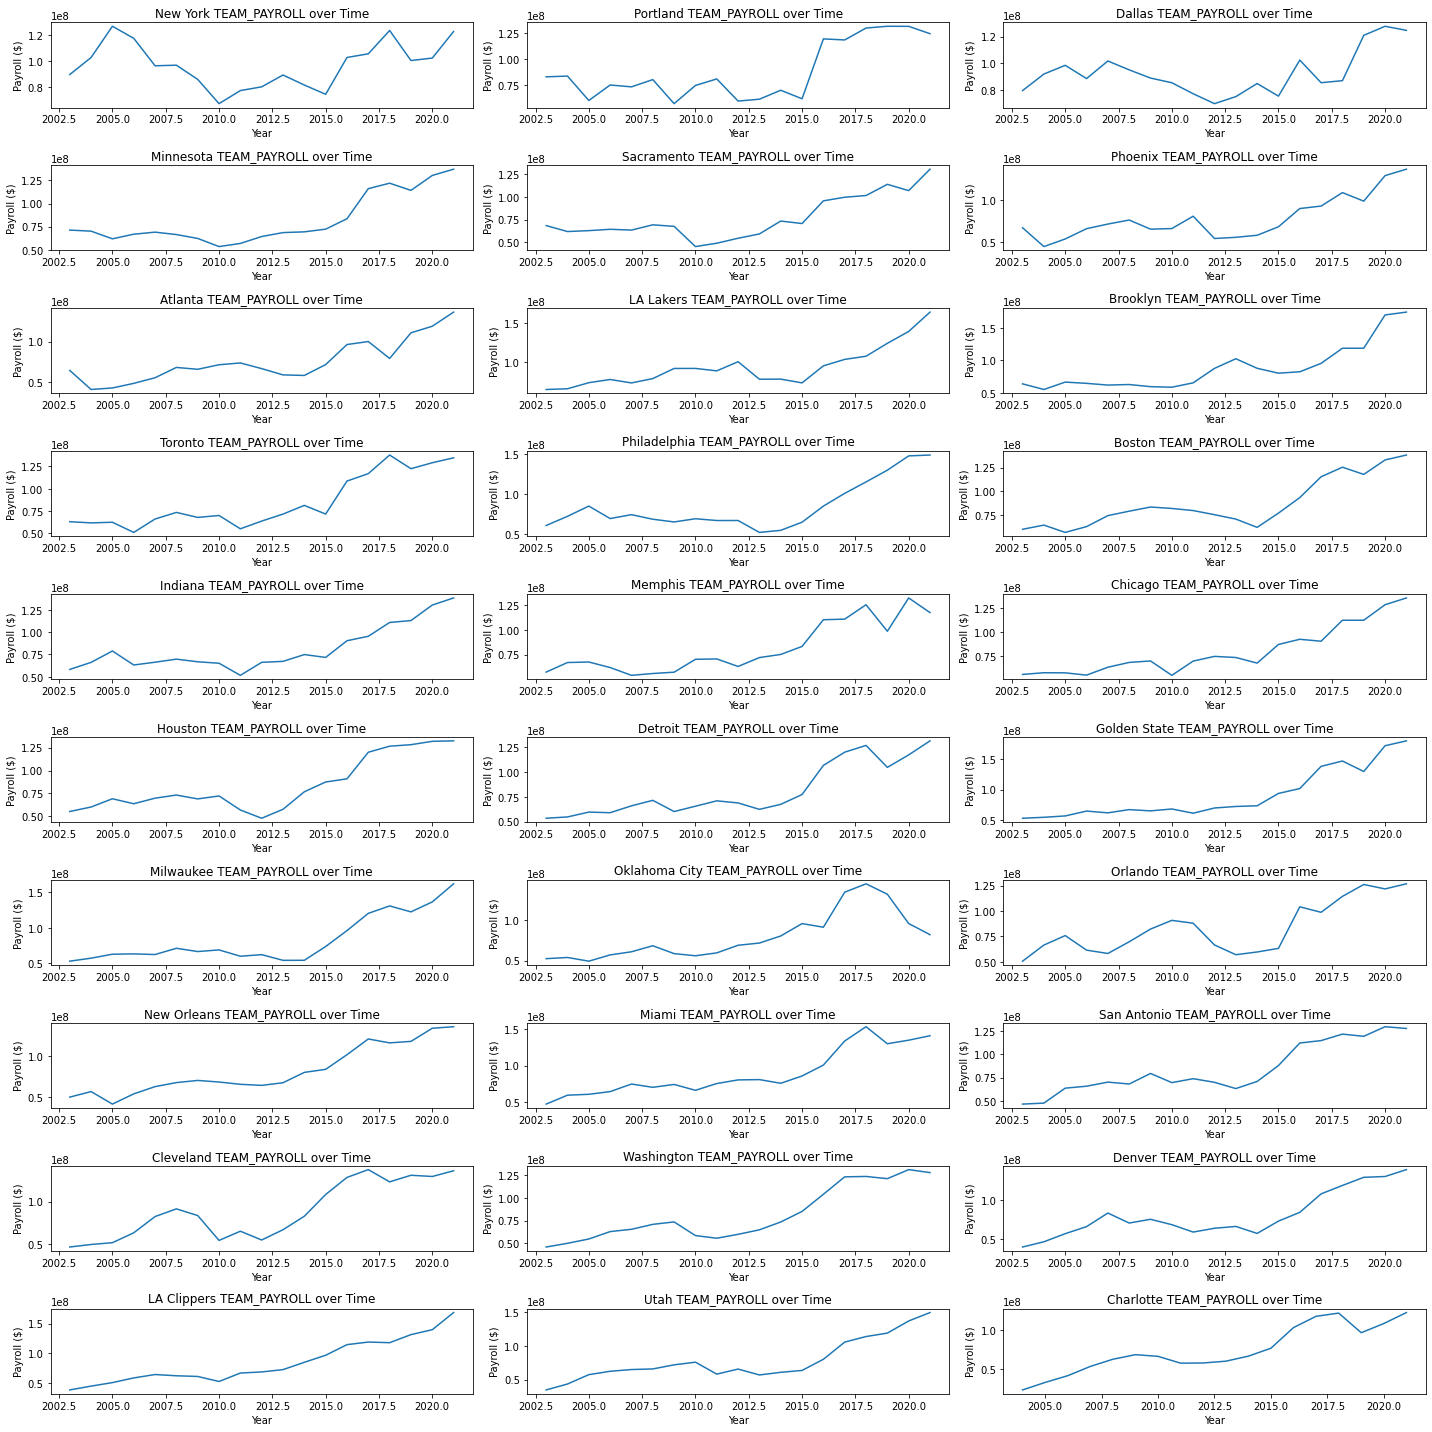

In [76]:
#plot of the non-adjusted inflation payroll
plot2('TEAM_PAYROLL')

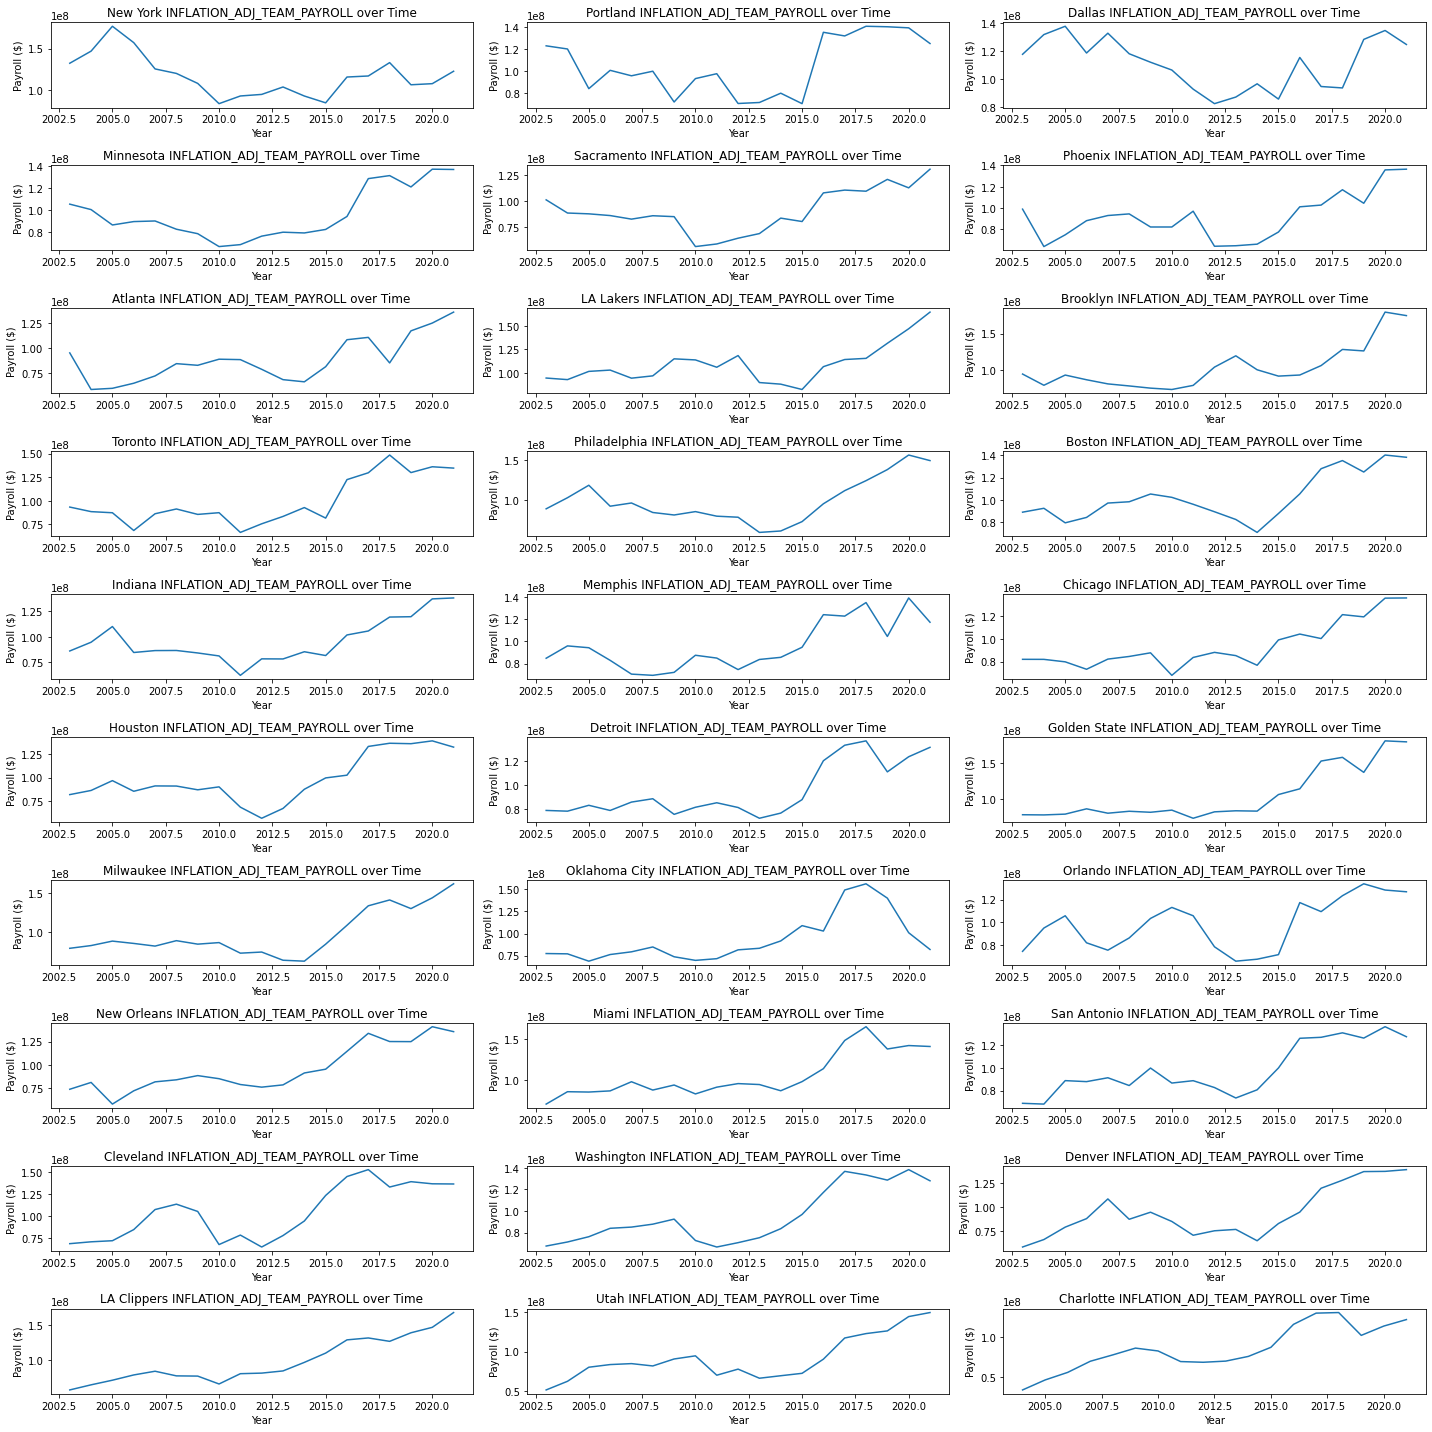

In [77]:
#plot of the inflation adjusted payroll 
plot2('INFLATION_ADJ_TEAM_PAYROLL')

### Average of Stats and Salary Correlation
Do we see a greater correlation between the average of stats and the salary, or the game-by-game stats and salary?

In [80]:
g = df.groupby(['PLAYER_ID', 'SEASON_START']).mean()
g.head()

FGM       FGA    FG_PCT      FG3M      FG3A  \
PLAYER_ID SEASON_START                                                     
15        2003          1.440000  3.840000  0.343820  0.860000  2.440000   
          2004          1.602740  3.794521  0.354096  0.849315  2.013699   
          2005          0.771429  1.914286  0.258343  0.314286  1.085714   
          2006          0.833333  2.166667  0.328667  0.583333  1.500000   
          2007          0.705882  1.941176  0.296059  0.647059  1.529412   

                         FG3_PCT       FTM       FTA    FT_PCT      OREB  ...  \
PLAYER_ID SEASON_START                                                    ...   
15        2003          0.309060  0.280000  0.320000  0.143340  0.200000  ...   
          2004          0.286548  0.698630  0.863014  0.250685  0.219178  ...   
          2005          0.174286  0.114286  0.200000  0.057143  0.142857  ...   
          2006          0.225667  0.166667  0.166667  0.083333  0.166667  ...   
          2007          0.342176  0.235294  0.235294  0.117647  0.058824  ...   

                        WON_GAME     SALARY  INFLATION_ADJ_SALARY  \
PLAYER_ID SEASON_START                                              
15        2003          0.440000  2500000.0             3697550.0   
          2004          0.534247  2750000.0             3938661.0   
          2005          0.457143  3000000.0             4190683.0   
          2006          0.833333  1178348.0             1577882.0   
          2007          0.941176  1219590.0             1590374.0   

                        TEAM_PAYROLL  INFLATION_ADJ_TEAM_PAYROLL  \
PLAYER_ID SEASON_START                                             
15        2003            55401430.0                  81939823.0   
          2004            57276129.0                  82033174.0   
          2005            57166530.0                  79855609.0   
          2006            65841120.0                  88165438.0   
          2007            71323049.0                  93006958.0   

                        LEAGUE_PAYROLL  INFLATION_ADJ_LEAGUE_PAYROLL  \
PLAYER_ID SEASON_START                                                 
15        2003            1.672617e+09                  2.473835e+09   
          2004            1.773666e+09                  2.540316e+09   
          2005            1.897470e+09                  2.650565e+09   
          2006            1.939374e+09                  2.596944e+09   
          2007            2.063887e+09                  2.691358e+09   

                        TEAM_IMPORTANCE  LEAGUE_IMPORTANCE  TEAM_MARKET_SIZE  
PLAYER_ID SEASON_START                                                        
15        2003                 0.045125           0.001495          0.033123  
          2004                 0.048013           0.001550          0.032293  
          2005                 0.052478           0.001581          0.030128  
          2006                 0.017897           0.000608          0.033950  
          2007                 0.017100           0.000591          0.034558  

[5 rows x 29 columns]

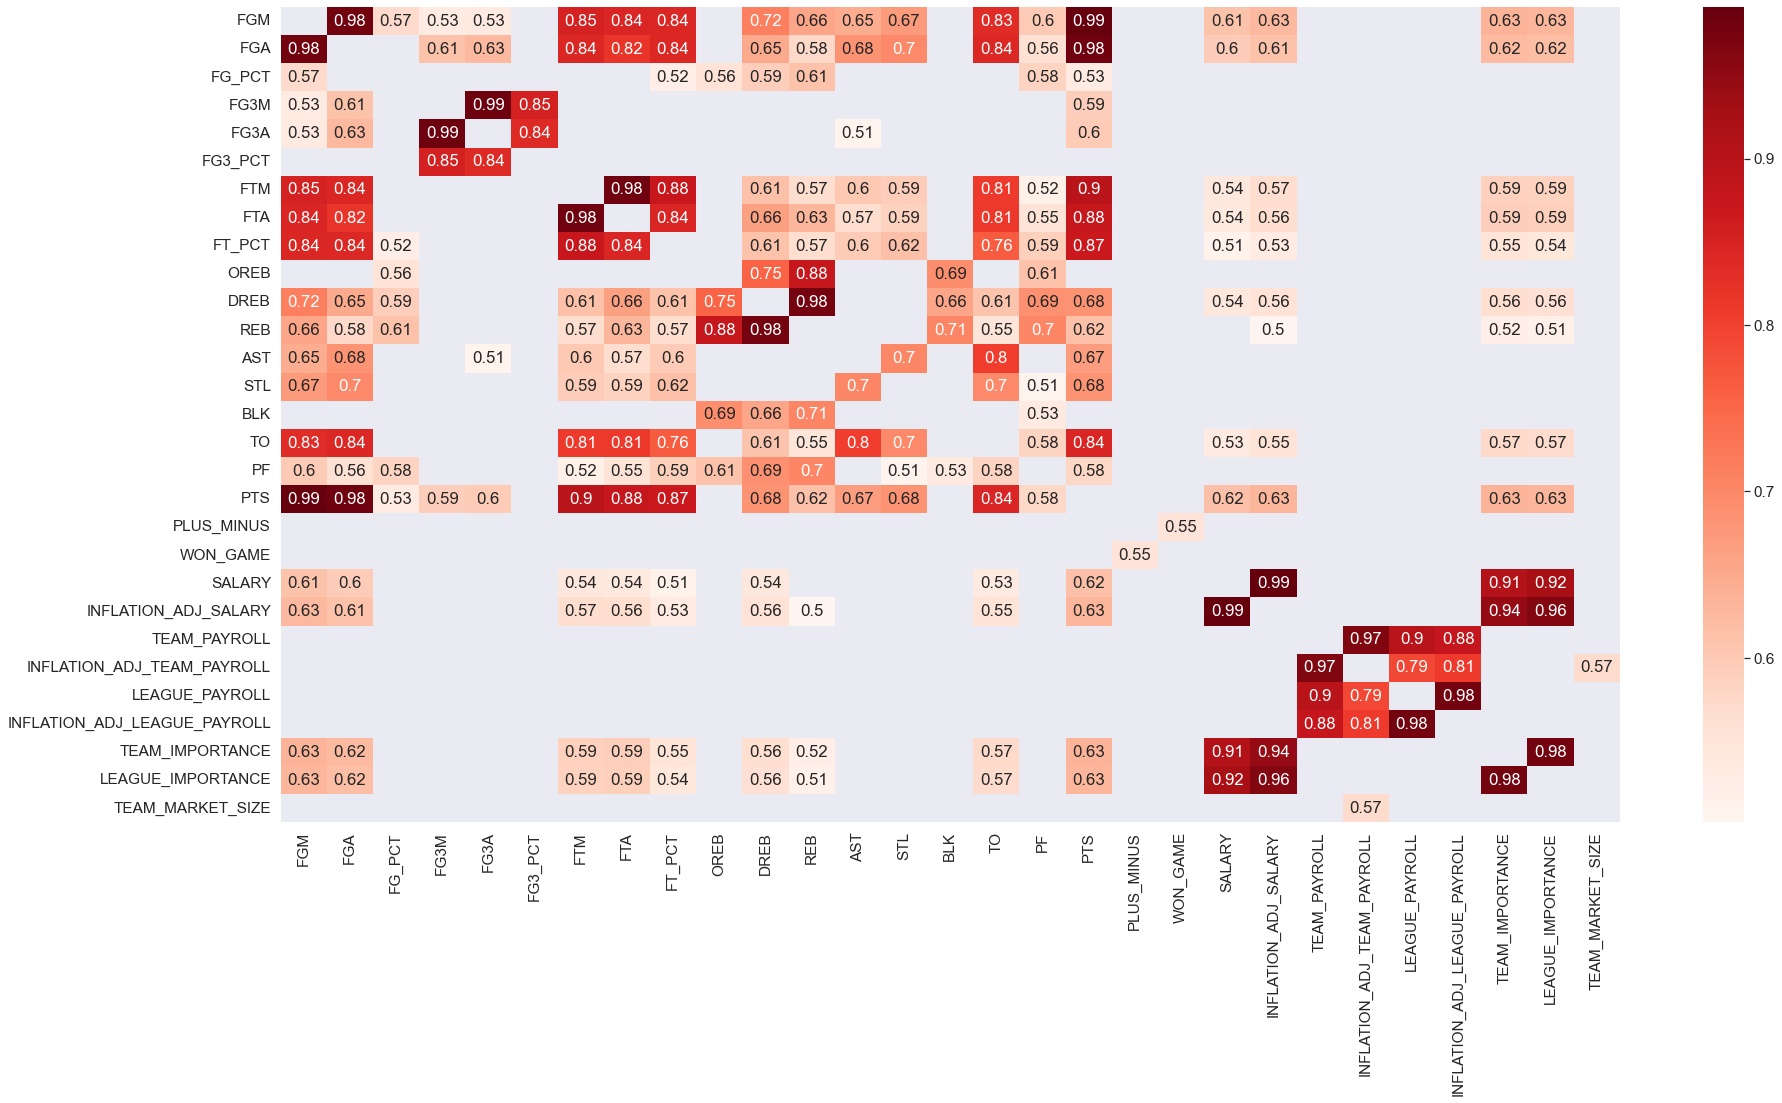

In [82]:
#linear correlation heatmap for AVERAGE stats and salary correlation
dfCorr = g.corr()
sn.set(font_scale=1.4)
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,15))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

### Game-by-Game Stats vs Salaries Correlation

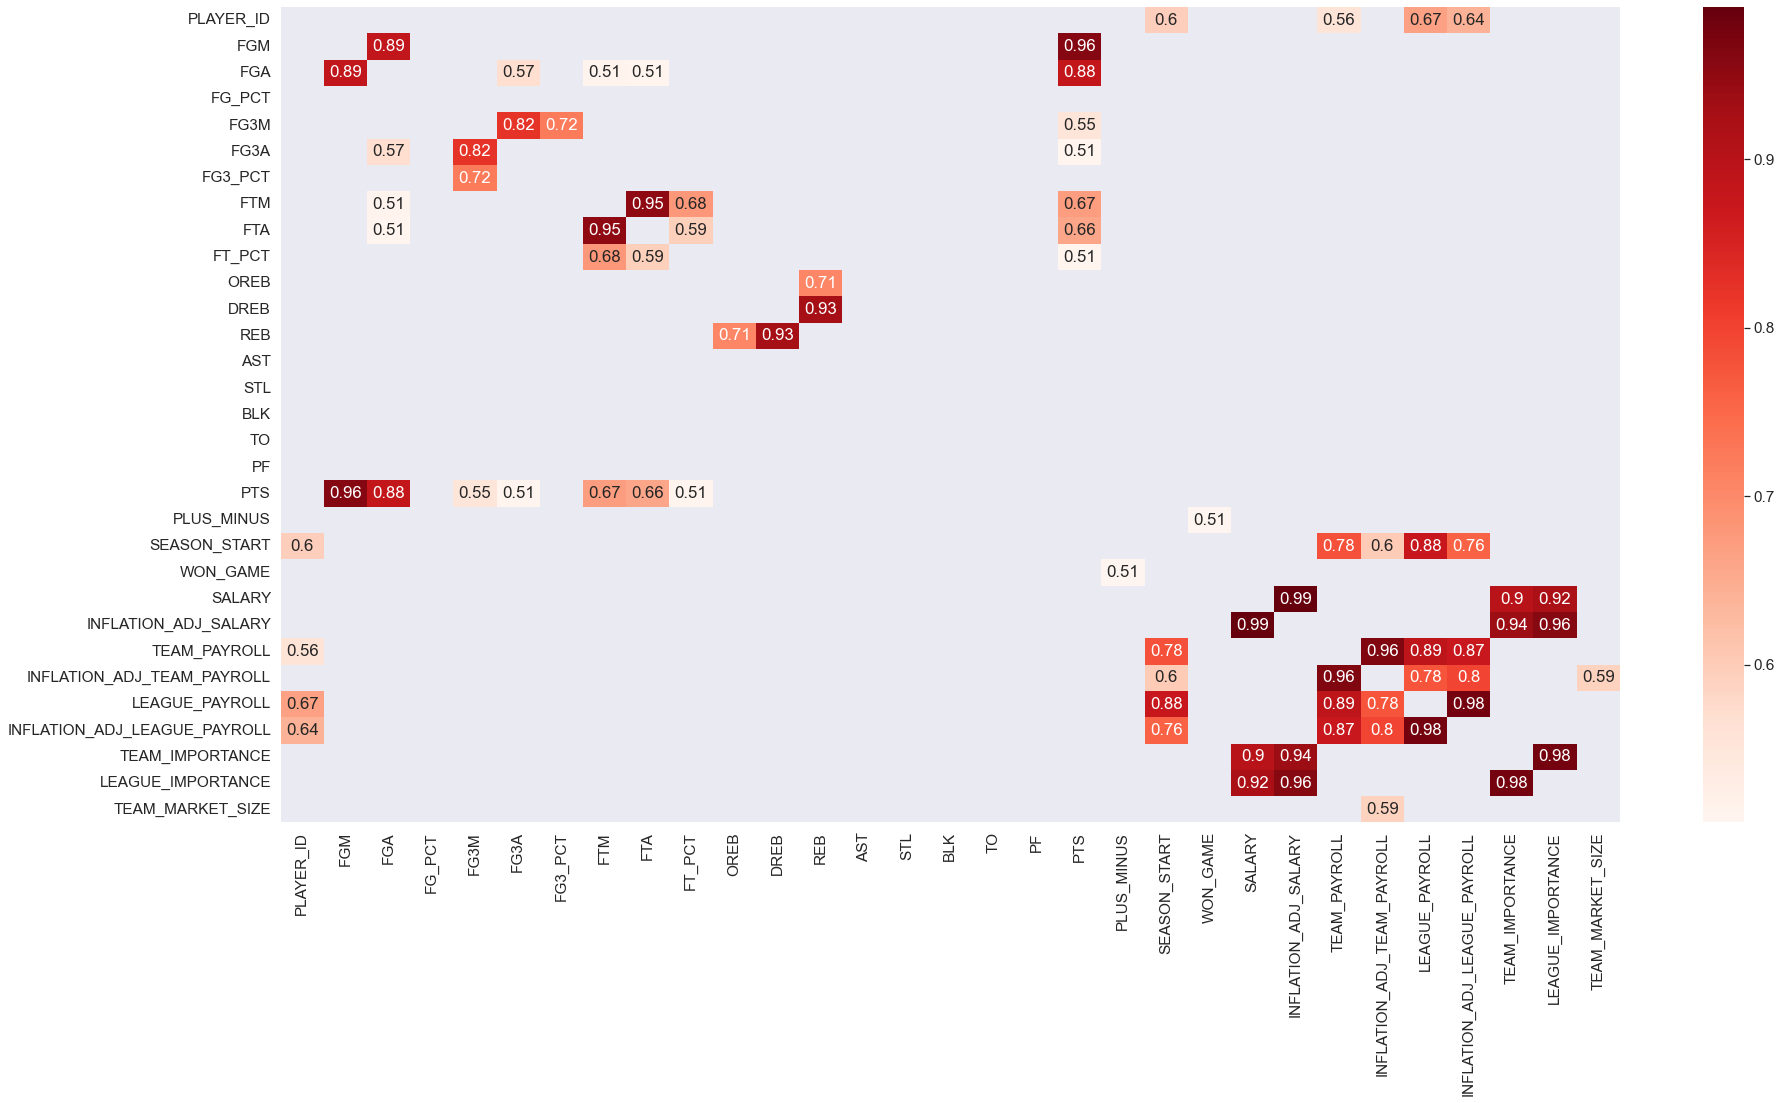

In [84]:
#linear correlation heatmap for GAME-BY-GAME stats and salary correlation
dfCorr = df.corr()
sn.set(font_scale=1.4)
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,15))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()